# Практика №6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

## Задача №1

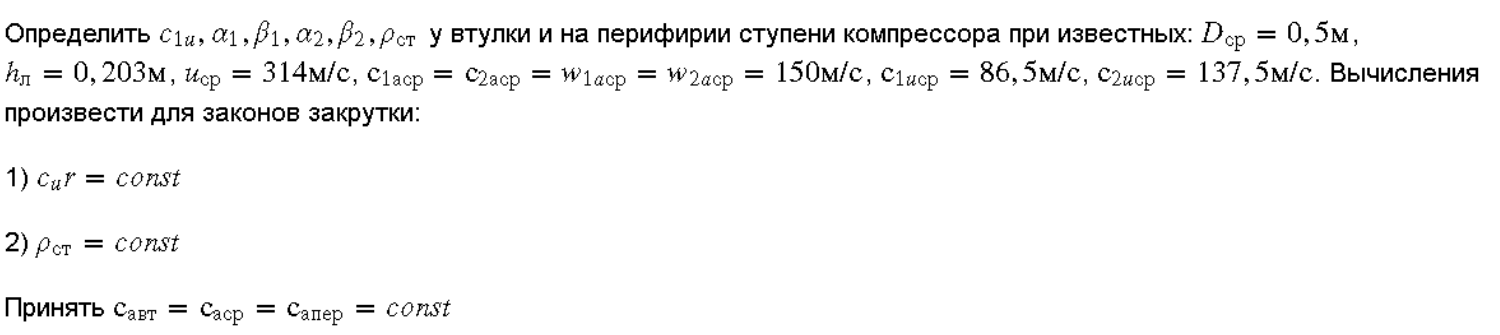

In [2]:
average_diameter = 0.5
blade_length = 0.203
u = 314
c_1_a = 150
c_2_a = 150
w_1_a = 150
w_2_a = 150
c_1_u = 86
c_2_u = 137.5

R = 287
k = 1.4

Посчитаем треугольники скоростей на среднем диаметре

In [3]:
alpha_1 = np.rad2deg(np.arctan(c_1_a / c_1_u))
alpha_1

60.17291534552527

In [4]:
alpha_2 = np.rad2deg(np.arctan(c_2_a / c_2_u))
alpha_2

47.489552921999156

In [5]:
w_1_u = u - c_1_u

beta_1 = np.rad2deg(np.arctan(w_1_a / w_1_u))
beta_1

33.340707346477004

In [6]:
w_2_u = u - c_2_u

beta_2 = np.rad2deg(np.arctan(w_2_a / w_2_u))
beta_2

40.359824749134866

Посчитам граничные значения диаметров

In [7]:
d_hub = average_diameter - blade_length
d_shroud = average_diameter + blade_length
d_hub, d_shroud

(0.297, 0.7030000000000001)

In [8]:
def u_func(d):
    """
    Окружная скорость для любого диаметра из [d_hub, d_shroud]
    """
    if isinstance(d, (int, float)):
        if d >= d_hub and d <= d_shroud:
            return u * d / average_diameter
        else:
            raise ValueError(f"d should be within [{d_hub}, {d_shroud}]")
    else:
        if all(d >= d_hub) and all(d <= d_shroud):
            return u * d / average_diameter
        else:
            raise ValueError(f"d should be within [{d_hub}, {d_shroud}]")

In [9]:
u_func(d=d_hub), u_func(d_shroud)

(186.516, 441.48400000000004)

Подсчитаем теплоперепад на лопатку

In [10]:
heat_drop = (c_2_u - c_1_u) * u
heat_drop

16171.0

Подсчитаем степень реактивности на среднем диаметре

In [11]:
degree_of_reaction = 1 - (c_1_u / u) - ((c_2_u - c_1_u) / (2 * u))
degree_of_reaction

0.6441082802547772

In [12]:
def speed_circulation_law(d, speed):
    return speed * average_diameter / d


c_1_u_circulation = partial(speed_circulation_law, speed=c_1_u)
c_2_u_circulation = partial(speed_circulation_law, speed=c_2_u)

In [43]:
def c_1_u_dor_constant(d):
    return c_1_u * d / average_diameter

def c_2_u_dor_constant(d):
    a = (c_2_u - c_1_u) / (2 * u)
    return (a * 2 * u_func(d)) + c_1_u_dor_constant(d)

In [44]:
def alpha_1_func(d, c_func):
    return np.rad2deg(np.arctan(c_1_a / c_func(d)))

def alpha_2_func(d, c_func):
    return np.rad2deg(np.arctan(c_2_a / c_func(d)))

def beta_1_func(d, c_func):
    return np.rad2deg(np.arctan(w_1_a / (u_func(d) - c_func(d))))

def beta_2_func(d, c_func):
    w_u = u_func(d) - c_func(d)
    w = (w_2_a ** 2 + w_u ** 2) ** 0.5
    return np.rad2deg(np.arccos(w_u / w))

In [45]:
def dor_func(d, c1_func, c2_func):
    return 1 - (c1_func(d) / u_func(d)) - ((c2_func(d) - c1_func(d)) / (2 * u_func(d)))

In [62]:
def heat_drop_func(d, c1_func, c2_func):
    return (c2_func(d) - c1_func(d)) * u_func(d)

In [63]:
def sample_values(func, *args):
    d = np.linspace(d_hub, d_shroud, 100)
    return func(d, *args), d

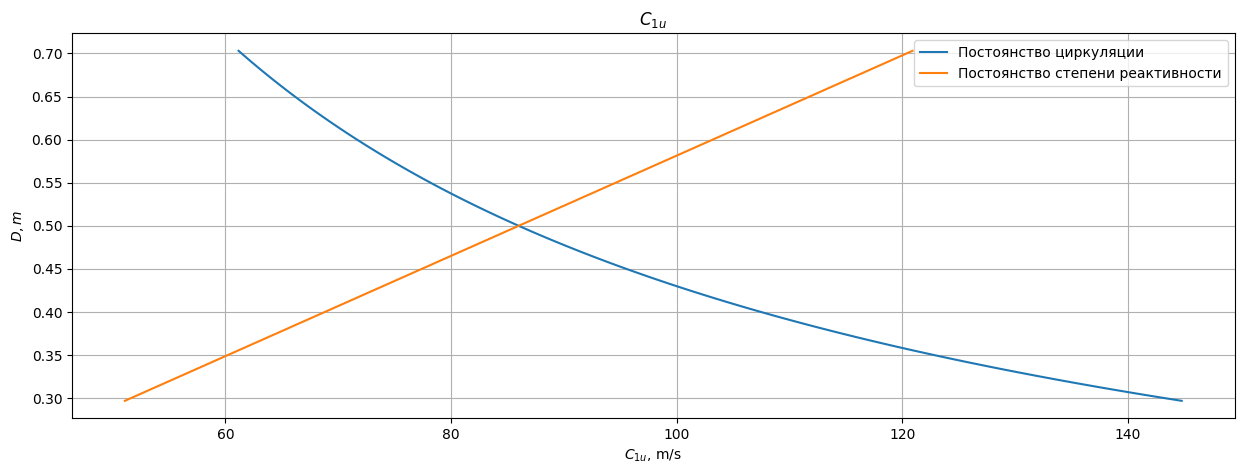

In [64]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(c_1_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(c_1_u_dor_constant), label='Постоянство степени реактивности')
ax.set_title("$C_{1u}$")
ax.set_xlabel("$C_{1u}$, m/s")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

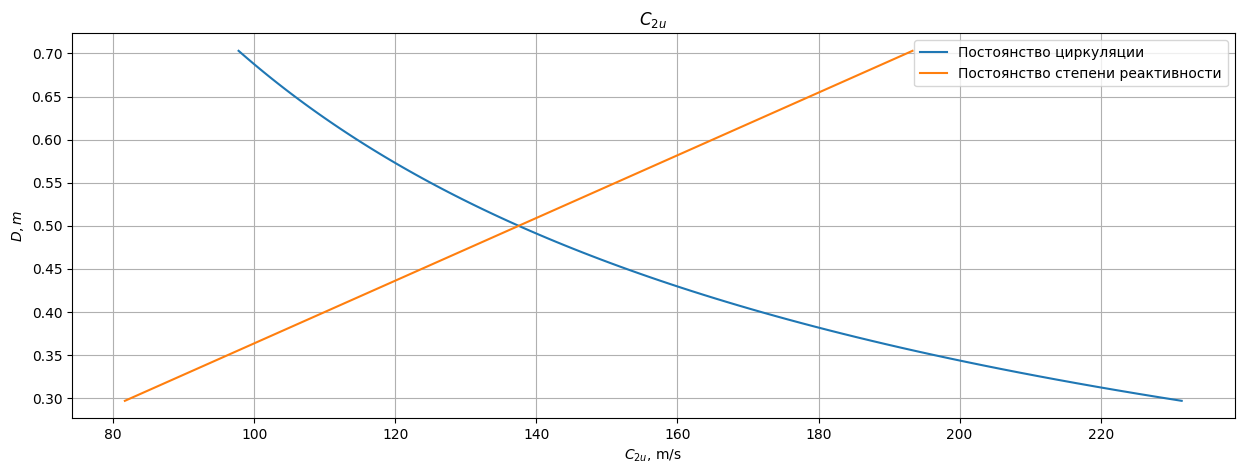

In [65]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(c_2_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(c_2_u_dor_constant), label='Постоянство степени реактивности')
ax.set_title("$C_{2u}$")
ax.set_xlabel("$C_{2u}$, m/s")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

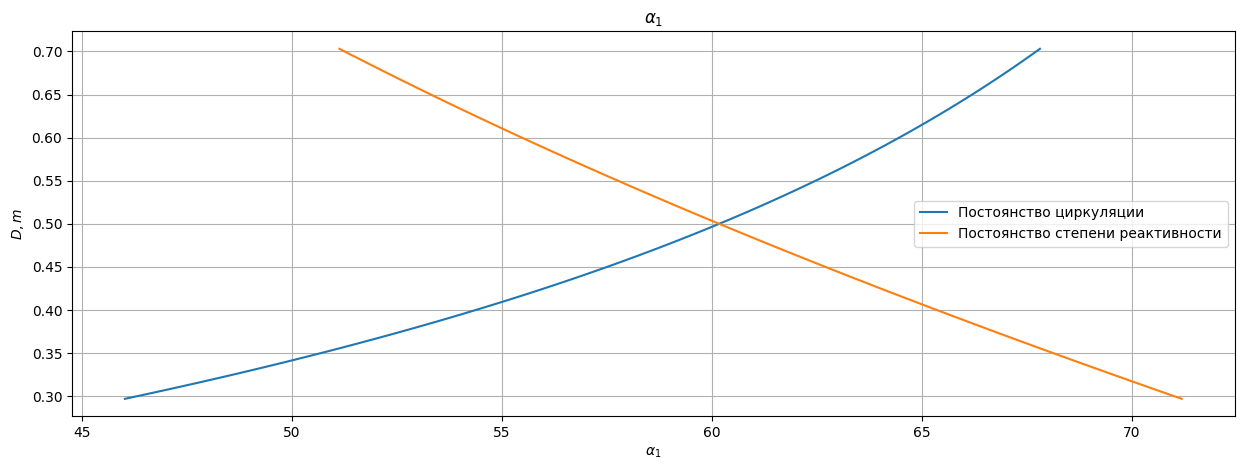

In [66]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(alpha_1_func, c_1_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(alpha_1_func, c_1_u_dor_constant), label='Постоянство степени реактивности')
ax.set_title("$\\alpha_1$")
ax.set_xlabel("$\\alpha_1 $")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

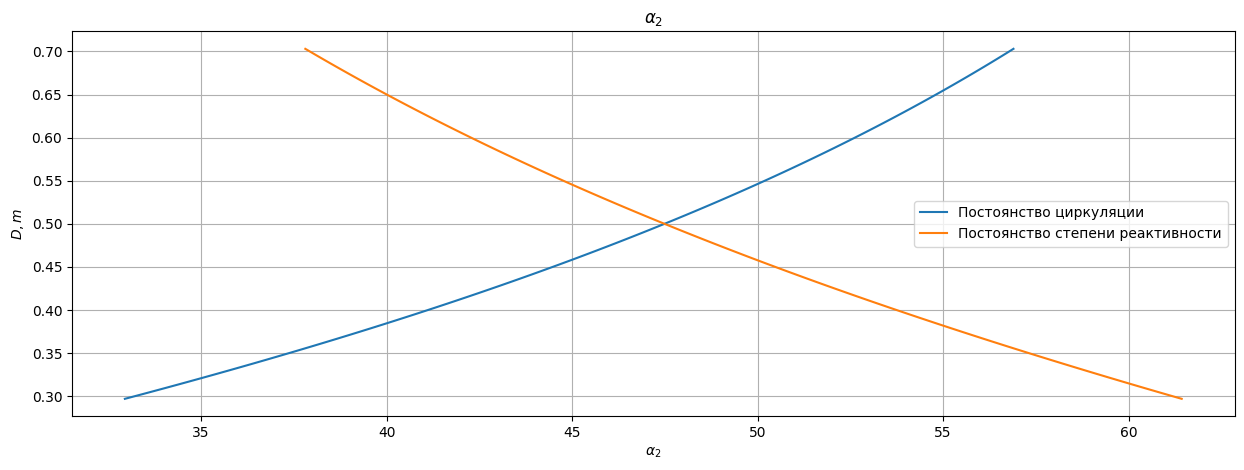

In [67]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(alpha_2_func, c_2_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(alpha_2_func, c_2_u_dor_constant), label='Постоянство степени реактивности')
ax.set_title("$\\alpha_2$")
ax.set_xlabel("$\\alpha_2 $")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

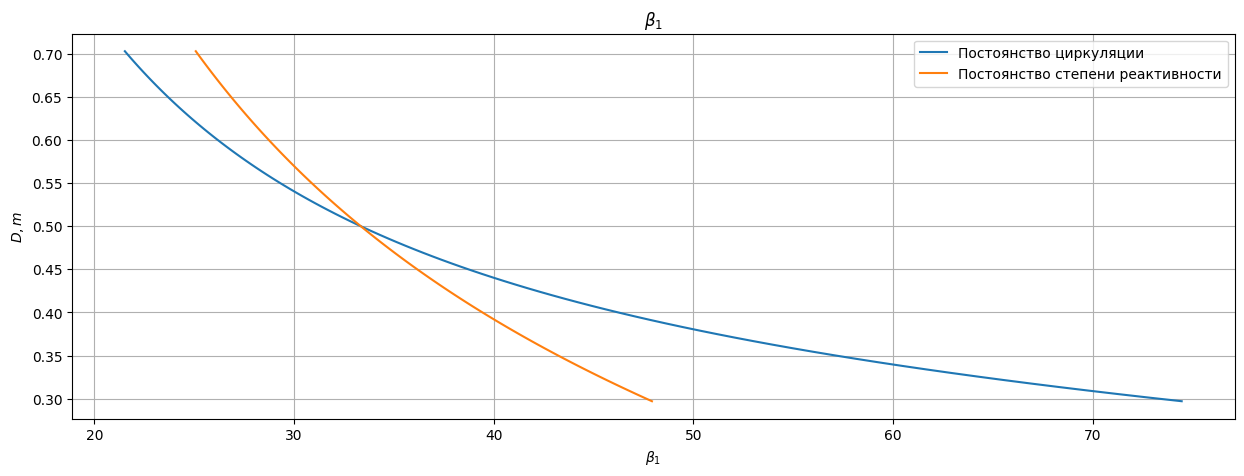

In [68]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(beta_1_func, c_1_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(beta_1_func, c_1_u_dor_constant), label='Постоянство степени реактивности')
ax.set_title("$\\beta_1$")
ax.set_xlabel("$\\beta_1$")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

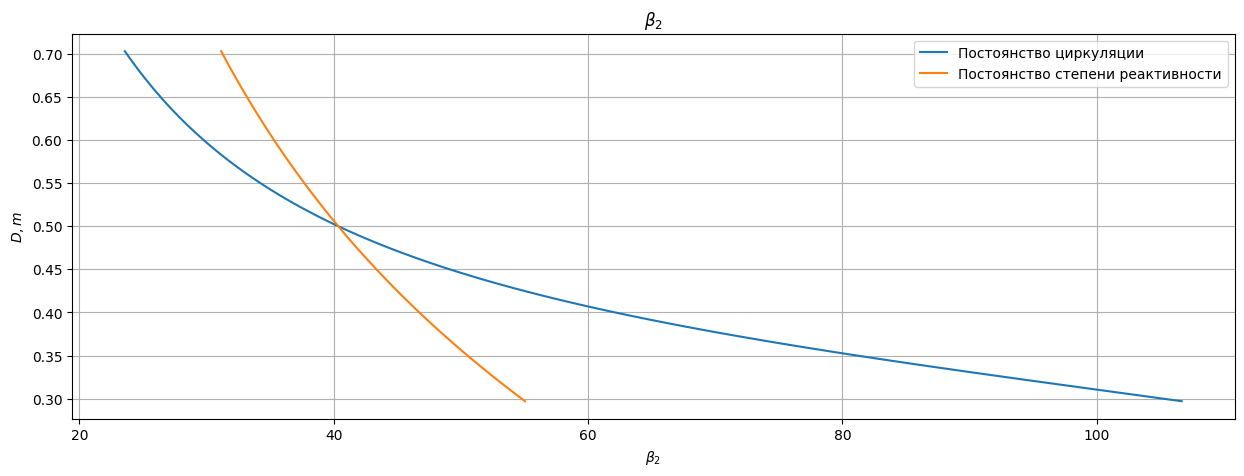

In [69]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(beta_2_func, c_2_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(beta_2_func, c_2_u_dor_constant), label='Постоянство степени реактивности')
ax.set_title("$\\beta_2$")
ax.set_xlabel("$\\beta_2 $")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

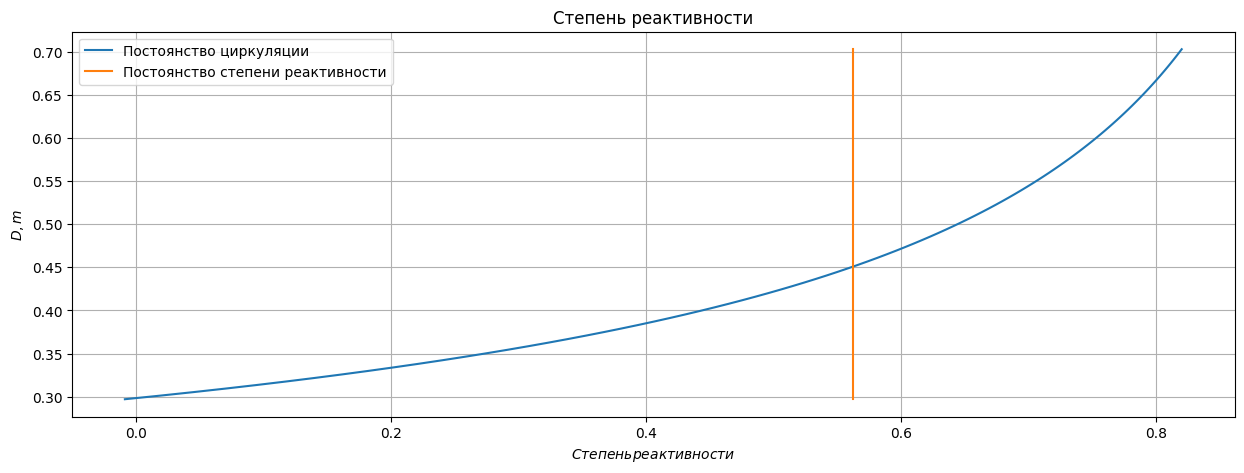

In [70]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(dor_func, c_1_u_circulation, c_2_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(dor_func, c_2_u_dor_constant, c_2_u_dor_constant), label='Постоянство степени реактивности')
ax.set_title("Степень реактивности")
ax.set_xlabel("$Степень реактивности$")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

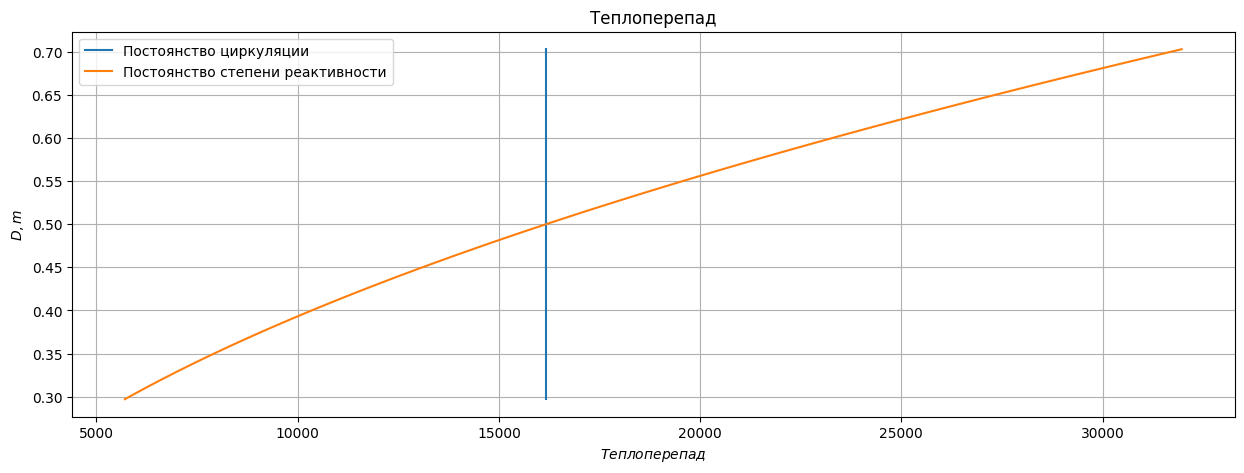

In [71]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(heat_drop_func, c_1_u_circulation, c_2_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(heat_drop_func, c_1_u_dor_constant, c_2_u_dor_constant), label='Постоянство степени реактивности')
ax.set_title("Теплоперепад")
ax.set_xlabel("$Теплоперепад$")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();